### Práctica 20 Ensayo de un modelo PCA

Utilizaremos el dataset Iris, que contiene 150 muestras de flores de iris con 4 características (longitud y ancho del sépalo y pétalo) y una etiqueta que indica la especie.

Las variables se estandarizan para que tengan media 0 y desviación estándar 1, ya que PCA es sensible a la escala de las variables.

Se genera un mapa de calor para visualizar la correlación entre las variables originales.

Se aplica PCA para reducir la dimensionalidad de 4 a 2 componentes principales.

Se muestra la varianza explicada por cada componente principal y se grafica la varianza explicada acumulada.

Se grafican los dos primeros componentes principales para visualizar cómo se separan las diferentes especies en el espacio reducido.



#### Las métricas utilizadas son:

Varianza explicada: Indica cuánta información (varianza) es capturada por cada componente principal.

Varianza explicada acumulada: Muestra cuánta varianza se retiene al considerar un número creciente de componentes principales.

Primeras filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   especie  
0        0  
1        0  
2        0  
3        0  
4        0  


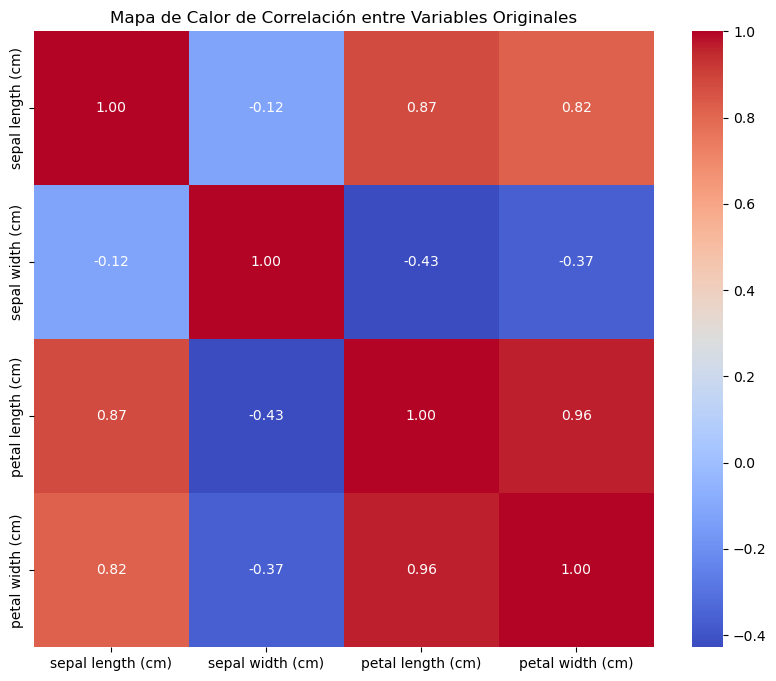


Varianza explicada por cada componente principal:
PC1: 0.7296
PC2: 0.2285
PC3: 0.0367
PC4: 0.0052


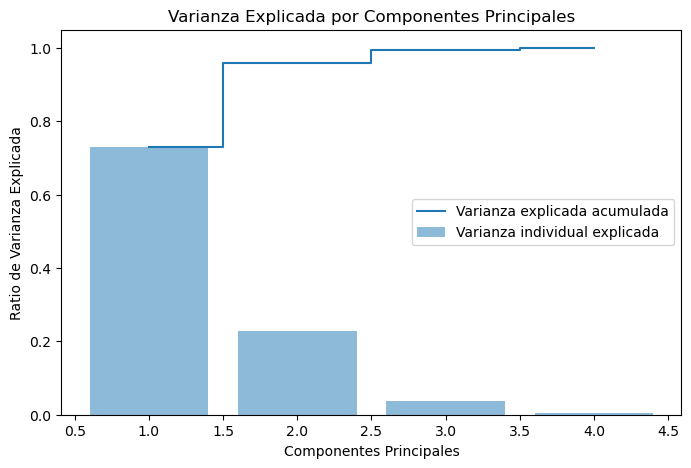

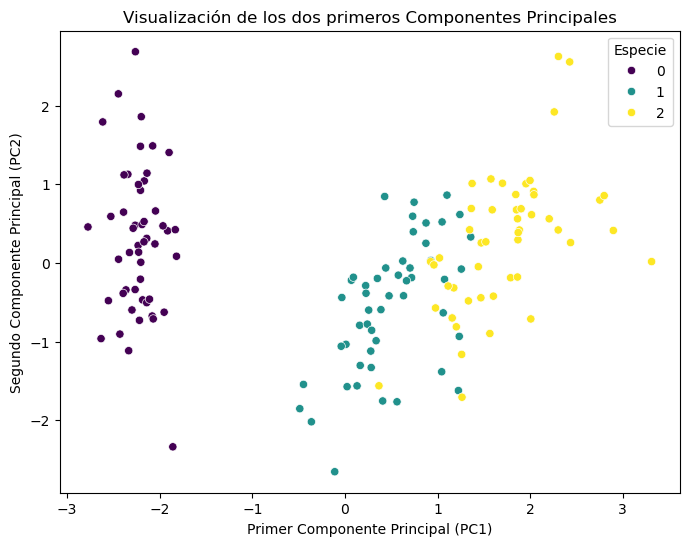


Primeras filas del dataset transformado con PCA:
        PC1       PC2       PC3       PC4  especie
0 -2.264703  0.480027  0.127706 -0.024168        0
1 -2.080961 -0.674134  0.234609 -0.103007        0
2 -2.364229 -0.341908 -0.044201 -0.028377        0
3 -2.299384 -0.597395 -0.091290  0.065956        0
4 -2.389842  0.646835 -0.015738  0.035923        0


In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['especie'] = iris.target

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Estandarizar las variables (PCA es sensible a la escala de las variables)
scaler = StandardScaler()
df_estandarizado = scaler.fit_transform(df.iloc[:, :-1])

# Matriz de correlación
matriz_correlacion = np.corrcoef(df_estandarizado, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Mapa de Calor de Correlación entre Variables Originales')
plt.show()

# Aplicar PCA
# pca = PCA(n_components=0.95)
# pca = PCA(n_components=2)
pca = PCA()
componentes_principales = pca.fit_transform(df_estandarizado)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=componentes_principales, columns=['PC1', 'PC2','PC3', 'PC4'])
df_pca['especie'] = iris.target

# Mostrar la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
print("\nVarianza explicada por cada componente principal:")
for i, var in enumerate(varianza_explicada):
    print(f"PC{i+1}: {var:.4f}")

# Gráfico de la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.5, align='center',
        label='Varianza individual explicada')
plt.step(range(1, len(varianza_explicada) + 1), np.cumsum(varianza_explicada), where='mid',
         label='Varianza explicada acumulada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Varianza Explicada por Componentes Principales')
plt.legend(loc='best')
plt.show()

# Visualizar los dos primeros componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='especie', data=df_pca, palette='viridis')
plt.title('Visualización de los dos primeros Componentes Principales')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.legend(title='Especie')
plt.show()

# Mostrar las nuevas variables (componentes principales)
print("\nPrimeras filas del dataset transformado con PCA:")
print(df_pca.head())

Conclusión: parece que seleccionando los dos primeros componentes principales obtendríamos una nuve de puntos realmente significativa que nos permitiría clasificar las plantas en la correspondiente clase

#### Ejercicio: 

Haciendo uso de los parametros adecuados en la funcion PCA(), modifica el programa para:

   1º Programar la generacion de solo dos PC´s.\
   2º Programar el nº de PC´s que generar un porcentual de varianza explicada del 0.95.

#### Ejercicio: 

Modifica el programa anterior para trabajar con el dataset California Housing. 

Está disponible a través de sklearn.datasets.fetch_california_housing.

Contiene información sobre viviendas en California, con un conjunto de características que describen diferentes aspectos socioeconómicos y demográficos de las áreas. Es un dataset utilizado en estudios de regresión y es muy adecuado para practicar técnicas de reducción de dimensionalidad como PCA.

Las características del dataset son:

MedInc: Ingreso medio de los hogares (en miles de dólares).\
HouseAge: Edad media de las casas (en años).\
AveRooms: Promedio de habitaciones por vivienda.\
AveOccup: Promedio de personas por vivienda.\
Latitude: Latitud de la ubicación geográfica.\
Longitude: Longitud de la ubicación geográfica.\
MedValue: Valor medio de las viviendas (en miles de dólares). Esta seria la caracteristica objetivo para regresión.\
Population: Población total en el área.\
AvgRooms: Promedio de habitaciones por vivienda.\
AvgOccup: Promedio de personas por vivienda en el área.\

Este dataset tiene 20,640 instancias y 10 características, lo que lo hace adecuado para realizar análisis de reducción de dimensionalidad, como PCA, para comprender cómo las distintas características se relacionan entre sí y cómo se puede reducir la cantidad de características sin perder demasiada información importante.